In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

from helper_functions.displayFunctions import *

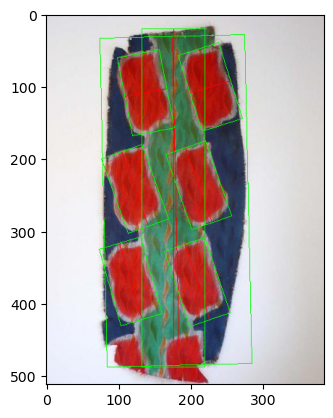

In [2]:
df = pd.read_csv('data/experiment_boxes.csv')

df_unique = df[df['id'] == 169]
df_upsi = df_unique[df_unique['file_name'] == 'claude-viallat_untitled-2007-235-2007.jpg']

disp = displayAllBB('claude-viallat_untitled-2007-235-2007.jpg', df_unique)

plt.imshow(disp)
plt.show()

In [12]:
def checkNestings(df: pd.DataFrame, threshold: float = 0.85):
    rows = len(df_upsi)

    # Check every combination of boxes
    for i in range(rows):
        for j in range(i+1, rows):

            # Create polygons from bounding boxes
            polyI = Polygon(getBBPoints(df.iloc[i]))
            polyJ = Polygon(getBBPoints(df.iloc[j]))
            areaI = polyI.area
            areaJ = polyJ.area
            min_area = min(areaI, areaJ)

            # Calculate intersection
            intersection = polyI.intersection(polyJ)
            intersection_perc = intersection.area / min_area

            # Intersection is above threshold
            if intersection_perc > threshold:
                print(f'Boxes {i} and {j} are nested with {intersection_perc:.2f}% overlap')

checkNestings(df_upsi)

Boxes 0 and 1 are nested with 1.00% overlap
Boxes 0 and 2 are nested with 1.00% overlap
Boxes 0 and 3 are nested with 1.00% overlap
Boxes 0 and 4 are nested with 1.00% overlap
Boxes 0 and 5 are nested with 0.98% overlap
Boxes 0 and 6 are nested with 1.00% overlap
Boxes 0 and 7 are nested with 0.97% overlap
